# Strategy 1:

Randomly pick any positional player who played (game does not let you pick a starting pitcher in the NL).

Number of picks per day:  1
<br>Pick any season
<br>Play everyday of the season
<br>Simulate experiment 1,000 times
<br>Plot and show results

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from streak_counter import streak_counter, hit_checker
import random
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

d = pd.read_csv('../retrosheet_data/2005-2018_games.csv')
d.rename(columns={'unknown':'double_header_flag'}, inplace=True)
d['ab_flag'] = d.ab_flag.map({'F':0,'T':1})

In [ ]:
df = d.copy()
year = int(input())
df = df[df['year'] == year]
groups = df.groupby(['month','day_'])

In [3]:
game_dates = groups.nunique().index.tolist()

In [5]:
list_streaks = []
list_streaks2 = []
for _ in tqdm(range(1000)):
    streak = 0   #reset the streak every time the season ends
    streak2 = 0
    for dates in game_dates:   #game_dates is a list of tuples, each tuple is (month, day)
        daily_df = groups.get_group(dates)
        #req to remove pitchers since you cant pick them
        available_batters = set(daily_df.res_batter.unique())  - set (daily_df.res_pitcher)   
        batters = random.sample((available_batters),1)
        batters2 = random.sample((available_batters),2)
        new_streak2 = hit_checker(daily_df,batters2)
        new_streak = hit_checker(daily_df, batters)
        if new_streak == 'continue_streak':
            pass
        elif new_streak == 'lose_streak' :
            list_streaks.append(streak)
            streak = 0
        else:
            streak = streak + new_streak
        if new_streak2 == 'continue_streak' :
            pass
        elif new_streak2 == 'lose_streak':
            list_streaks2.append(streak2)
            streak2 = 0
        else:
            streak2 = streak2 + new_streak2

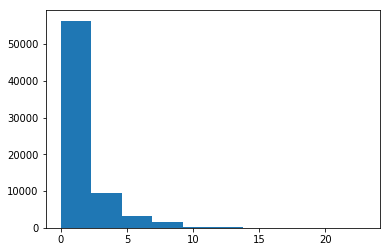

In [6]:
plt.hist(list_streaks);

In [7]:
l_series = pd.Series(list_streaks).value_counts()
l_series

0     28851
1     17359
2     10119
3      5937
4      3580
5      2082
6      1217
7       750
8       458
9       269
10      175
11       94
12       60
13       29
14       23
15       17
17        7
16        4
18        4
21        3
19        1
23        1
dtype: int64

In [10]:
results = l_series.to_frame().reset_index()
results.rename(columns={'index':'Streak',0:'number_of_times'},inplace=True)
results['percentage'] = results['number_of_times'] / sum(results['number_of_times'])
results.sort_values(by='Streak',inplace=True);

In [11]:
results

,Streak,number_of_times,percentage
0,0,28851,0.406123
1,1,17359,0.244355
2,2,10119,0.142441
3,3,5937,0.083573
4,4,3580,0.050394
5,5,2082,0.029307
6,6,1217,0.017131
7,7,750,0.010557
8,8,458,0.006447
9,9,269,0.003787


In [13]:
l_series2 = pd.Series(list_streaks2).value_counts()
l_series2

0     73253
2     24867
4      8543
6      2852
1      1418
8       967
3       950
5       474
10      348
7       247
12      123
9       112
14       49
11       33
16       20
13       11
15        9
17        4
20        3
22        2
21        1
dtype: int64

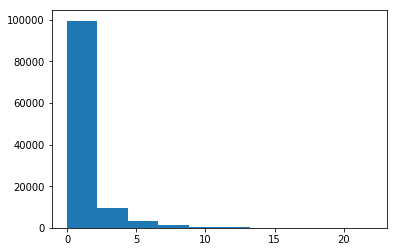

In [12]:
plt.hist(list_streaks2);

In [15]:
results = l_series2.to_frame().reset_index()
results.rename(columns={'index':'Streak',0:'number_of_times'},inplace=True)
results['percentage'] = results['number_of_times'] / sum(results['number_of_times'])
results.sort_values(by='Streak',inplace=True);
results

,Streak,number_of_times,percentage
0,0,73253,0.640962
4,1,1418,0.012407
1,2,24867,0.217586
6,3,950,0.008312
2,4,8543,0.074751
7,5,474,0.004147
3,6,2852,0.024955
9,7,247,0.002161
5,8,967,0.008461
11,9,112,0.000980


In [9]:
print('total number of streaks:', sum(l_series))

total number of streaks: 71461
